<H1 align="center">“The PyData Toolbox with Scott Sanderson” notebook</H1>

<h2 align="center">Fernando Moreno Bautista</h2>
<h2 align="center"> 1013656283</h2>
<h2 align="center">Metodos Númericos</h2>


In [3]:
!pip install -U fortran-magic

In [4]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


# About Me:

<img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/me.jpg?raw=1" alt="Drawing" width="500px"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# NUEVO EJEMPLO
List = ["hola", "soy", 1, "lista", "combinada", 4,4,5]
List

['hola', 'soy', 1, 'lista', 'combinada', 4, 4, 5]

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# NUEVO EJEMPLO
# Lists can be indexed like C-style arrays.
second = List[1]
third = List[2]
print("second element:", second)
print("third element: ",third)

second element: soy
third element:  1


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# NUEVO EJEMPLO
# Negative indexing gives elements relative to the end of the list.
ultimo = List[-1]
penultimo = List[-2]
print("last element:", ultimo)
print("second to last element: ",penultimo)

last element: 5
second to last element:  4


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# NUEVO EJEMPLO
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = List[1:-3]
sublist

['soy', 1, 'lista', 'combinada']

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# NUEVO EJEMPLO
# l[:N] is equivalent to l[0:N].
first_three = List[:-1]
first_three

['hola', 'soy', 1, 'lista', 'combinada', 4, 4]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# NUEVO EJEMPLO
# l[2:] is equivalent to l[2:len(l)].
after_three = List[3:]
after_three

['lista', 'combinada', 4, 4, 5]

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# NUEVO EJEMPLO
# There's also a third parameter, "step", which gets every Nth element.
List = ["si","la","vida","fura","estable", "Todo", "tiempo"]
List[0:8:2]

['si', 'vida', 'estable', 'tiempo']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# NUEVO EJEMPLO
# This is a cute way to reverse a list.
List[::-1]

['tiempo', 'Todo', 'estable', 'fura', 'vida', 'la', 'si']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# NUEVO EJEMPLO
# Lists can be grown efficiently (in O(1) amortized time).
print("Before:", List)
List.append("Yo no beberia")
print("Afer:", List)

Before: ['si', 'la', 'vida', 'fura', 'estable', 'Todo', 'tiempo']
Afer: ['si', 'la', 'vida', 'fura', 'estable', 'Todo', 'tiempo', 'Yo no beberia']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [ ]:
# NUEVO EJEMPLO
# Comprehensions let us perform elementwise computations.
[x * 3 for x in List]

['sisisi',
 'lalala',
 'vidavidavida',
 'furafurafura',
 'estableestableestable',
 'TodoTodoTodo',
 'tiempotiempotiempo',
 'Yo no beberiaYo no beberiaYo no beberia']

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [ ]:
# NUEVO EJEMPLO
# Dictionaries are key-value mappings.
fruits = {'Pera': 'Verde', 'Manzana': 'Roja', 'Melon': 'Amarillo'}
fruits

{'Manzana': 'Roja', 'Melon': 'Amarillo', 'Pera': 'Verde'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [ ]:
# NUEVO EJEMPLO
# Like lists, dictionaries are size-mutable.
fruits['Fresa'] = 'Roja'
fruits

{'Fresa': 'Roja', 'Manzana': 'Roja', 'Melon': 'Amarillo', 'Pera': 'Verde'}

In [ ]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [ ]:
# NUEVO EJEMPLO
del fruits['Fresa']
fruits

{'Manzana': 'Roja', 'Melon': 'Amarillo', 'Pera': 'Verde'}

In [ ]:
# No slicing.
#philosophers['Bertrand':'Immanuel']


## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
# NUEVO EJEMPLO
# Suppose we have some matrices...
f = [[9, 8, 7],
     [2, 3, 4],
     [4, 4, 4]]

b = [[9, 7, 4, 4],
     [7, 6, 5, 4]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [ ]:
# NUEVO EJEMPLO
def multimat(F, B):
    """Multiply matrix F by matrix B."""
    rows_out = len(F)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(F)):
                out[i][j] += F[i][k] * B[k][j]
    return out

In [ ]:
%%time

matmul(a, b)

CPU times: user 50 µs, sys: 0 ns, total: 50 µs
Wall time: 55.1 µs


[[23, 19, 14, 12], [39, 32, 23, 20], [87, 71, 50, 44], [16, 13, 9, 8]]

In [ ]:
# NUEVO EJEMPLO
%%time

matmul(f, b)

CPU times: user 38 µs, sys: 6 µs, total: 44 µs
Wall time: 57.5 µs


[[137, 111, 76, 68], [39, 32, 23, 20], [64, 52, 36, 32]]

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.7207000148653144, 0.9299273288672896, 0.9366169880999433],
 [0.5038987731634849, 0.14318658931377104, 0.049276800950747934]]

In [ ]:
# NUEVO EJEMPLO
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

ran = random_matrix(3, 3)
ran

[[0.7501488636122841, 0.5992015934176299, 0.8170546491733618],
 [0.9651975735484607, 0.0926238609392277, 0.7081618305267775],
 [0.05649528150030614, 0.27216281696604216, 0.30240245602577787]]

In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 11.2 s, sys: 14.9 ms, total: 11.3 s
Wall time: 11.3 s


In [ ]:
# NUEVO EJEMPLO
%%time
randa = random_matrix(500, 200)
randb = random_matrix(200, 500)
x = matmul(randa, randb)

CPU times: user 15 s, sys: 39.8 ms, total: 15.1 s
Wall time: 15.1 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
# NUEVO EJEMPLO
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xa, ya):
    return sum(x * y for x, y in zip(xa, ya))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
# NUEVO EJEMPLO
%%fortran
subroutine fortran_dot_product(xa, ya, result)
    double precision, intent(in) :: xa(:)
    double precision, intent(in) :: ya(:)
    double precision, intent(out) :: result
    
    result = sum(xa * ya)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
# NUEVO EJEMPLO
new_list_data = [float(i) for i in range(40000)]
new_array_data = np.array(new_list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 11.6 ms, sys: 0 ns, total: 11.6 ms
Wall time: 14.2 ms


333328333350000.0

In [ ]:
# NUEVO EJEMPLO
%%time
python_dot_product(new_list_data, new_list_data)

CPU times: user 5.03 ms, sys: 0 ns, total: 5.03 ms
Wall time: 4.99 ms


21332533340000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 255 µs, sys: 0 ns, total: 255 µs
Wall time: 261 µs


333328333350000.0

In [ ]:
# NUEVO EJEMPLO
%%time
fortran_dot_product(new_array_data, new_array_data)

CPU times: user 108 µs, sys: 0 ns, total: 108 µs
Wall time: 113 µs


21332533340000.0

## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# NUEVO EJEMPLO
# Dynamic typing.
def mul_elemwise(xa, ya):
    return [x * y for x, y in zip(xa, ya)]

mul_elemwise([6, 7, 8, 9], [6, 7 + 0j, 9.0, 'ten'])
#[type(x) for x in _]

[36, (49+0j), 72.0, 'tententententententententen']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
# NUEVO EJEMPLO
new_data = np.array(list(range(8)))
new_data

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
# NUEVO EJEMPLO
new_data + new_data

array([ 0,  2,  4,  6,  8, 10, 12, 14])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 1.22 ms, sys: 0 ns, total: 1.22 ms
Wall time: 3.49 ms


333328333350000.0

In [ ]:
# NUEVO EJEMPLO
%%time
# Naive dot product
(new_array_data * new_array_data).sum()

CPU times: user 1.24 ms, sys: 0 ns, total: 1.24 ms
Wall time: 1.33 ms


21332533340000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 2.63 ms, sys: 5.13 ms, total: 7.76 ms
Wall time: 11.1 ms


333328333350000.0

In [ ]:
# NUEVO EJEMPLO
%%time
# Built-in dot product.
new_array_data.dot(new_array_data)

CPU times: user 740 µs, sys: 1 ms, total: 1.74 ms
Wall time: 1.84 ms


21332533340000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 309 µs, sys: 0 ns, total: 309 µs
Wall time: 351 µs


333328333350000.0

In [ ]:
# NUEVO EJEMPLO
%%time
fortran_dot_product(new_array_data, new_array_data)

CPU times: user 106 µs, sys: 0 ns, total: 106 µs
Wall time: 111 µs


21332533340000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
# data[0] = "foo"

In [ ]:
# We also can't grow an array once it's created.
# data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

In [ ]:
# NUEVO EJEMPLO
# We **can** reshape an array though.
new_data
two_by_two = new_data.reshape(2, 4)
two_by_two

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


In [ ]:
# NUEVO EJEMPLO
new_arr = np.array([5, 6, 7, 8, 9, 9], dtype='int16').reshape(2, 3)
print("Array:\n", new_arr, sep='')
print("===========")
print("DType:", new_arr.dtype)
print("Shape:", new_arr.shape)
print("Strides:", new_arr.strides)
print("Data:", new_arr.data.tobytes())

Array:
[[5 6 7]
 [8 9 9]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\t\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# NUEVO EJEMPLO
new_data = np.arange(60).reshape(6, 10)
new_data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# NUEVO EJEMPLO
new_data * new_data

array([[   0,    1,    4,    9,   16,   25,   36,   49,   64,   81],
       [ 100,  121,  144,  169,  196,  225,  256,  289,  324,  361],
       [ 400,  441,  484,  529,  576,  625,  676,  729,  784,  841],
       [ 900,  961, 1024, 1089, 1156, 1225, 1296, 1369, 1444, 1521],
       [1600, 1681, 1764, 1849, 1936, 2025, 2116, 2209, 2304, 2401],
       [2500, 2601, 2704, 2809, 2916, 3025, 3136, 3249, 3364, 3481]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [ ]:
# NUEVO EJEMPLO
np.sqrt(new_data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
        2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739,
        3.87298335, 4.        , 4.12310563, 4.24264069, 4.35889894],
       [4.47213595, 4.58257569, 4.69041576, 4.79583152, 4.89897949,
        5.        , 5.09901951, 5.19615242, 5.29150262, 5.38516481],
       [5.47722558, 5.56776436, 5.65685425, 5.74456265, 5.83095189,
        5.91607978, 6.        , 6.08276253, 6.164414  , 6.244998  ],
       [6.32455532, 6.40312424, 6.4807407 , 6.55743852, 6.63324958,
        6.70820393, 6.78232998, 6.8556546 , 6.92820323, 7.        ],
       [7.07106781, 7.14142843, 7.21110255, 7.28010989, 7.34846923,
        7.41619849, 7.48331477, 7.54983444, 7.61577311, 7.68114575]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [ ]:
# NUEVO EJEMPLO
(new_data % 5) == 0

array([[ True, False, False, False, False,  True, False, False, False,
        False],
       [ True, False, False, False, False,  True, False, False, False,
        False],
       [ True, False, False, False, False,  True, False, False, False,
        False],
       [ True, False, False, False, False,  True, False, False, False,
        False],
       [ True, False, False, False, False,  True, False, False, False,
        False],
       [ True, False, False, False, False,  True, False, False, False,
        False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [ ]:
# NUEVO EJEMPLO
((new_data % 5) == 0) & ((new_data % 6) == 0)

array([[ True, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [ True, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [ ]:
# NUEVO EJEMPLO
new_data @new_data.T

array([[  285,   735,  1185,  1635,  2085,  2535],
       [  735,  2185,  3635,  5085,  6535,  7985],
       [ 1185,  3635,  6085,  8535, 10985, 13435],
       [ 1635,  5085,  8535, 11985, 15435, 18885],
       [ 2085,  6535, 10985, 15435, 19885, 24335],
       [ 2535,  7985, 13435, 18885, 24335, 29785]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
# NUEVO EJEMPLO
new_sines = np.sin(np.linspace(2, 5.70, 16))
new_cosines = np.cos(np.linspace(2, 5.70, 16))
new_cosines

array([-4.16146837e-01, -6.25576560e-01, -7.97136028e-01, -9.20439618e-01,
       -9.88022954e-01, -9.95794774e-01, -9.43284599e-01, -8.33671214e-01,
       -6.73590236e-01, -4.72732419e-01, -2.43257005e-01,  9.44352808e-04,
        2.45088543e-01,  4.74395914e-01,  6.74984986e-01,  8.34712785e-01])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
# NUEVO EJEMPLO
new_cosines[8]

-0.6735902361050841

In [ ]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [ ]:
# NUEVO EJEMPLO
new_cosines[-6:]  # Last six elements  

array([-0.243257  ,  0.00094435,  0.24508854,  0.47439591,  0.67498499,
        0.83471278])

In [ ]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
# NUEVO EJEMPLO
new_cosines[8:] # Form 8 on

array([-0.67359024, -0.47273242, -0.243257  ,  0.00094435,  0.24508854,
        0.47439591,  0.67498499,  0.83471278])

In [ ]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [ ]:
# NUEVO EJEMPLO
new_cosines[::2]  # Every other element.

array([-0.41614684, -0.79713603, -0.98802295, -0.9432846 , -0.67359024,
       -0.243257  ,  0.24508854,  0.67498499])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [ ]:
# NUEVO EJEMPLO
print("sines:\n", new_sines)
print("sines > 0.7:\n", new_sines > 0.7)
print("sines[sines > 0.7]:\n", new_sines[new_sines > 0.7])

sines:
 [ 0.90929743  0.78016278  0.60379976  0.39088478  0.15430697 -0.09161205
 -0.33198519 -0.55226109 -0.739105   -0.88120603 -0.96996187 -0.99999955
 -0.9695007  -0.8803116  -0.73783146 -0.55068554]
sines > 0.7:
 [ True  True False False False False False False False False False False
 False False False False]
sines[sines > 0.7]:
 [0.90929743 0.78016278]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [ ]:
# NUEVO EJEMPLO
# We index with lists/arrays of integers to select values at those indices.
print(new_cosines)
new_cosines[[2, 4, 6]]

[-4.16146837e-01 -6.25576560e-01 -7.97136028e-01 -9.20439618e-01
 -9.88022954e-01 -9.95794774e-01 -9.43284599e-01 -8.33671214e-01
 -6.73590236e-01 -4.72732419e-01 -2.43257005e-01  9.44352808e-04
  2.45088543e-01  4.74395914e-01  6.74984986e-01  8.34712785e-01]


array([-0.79713603, -0.98802295, -0.9432846 ])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])
unsorted_data

array([ 1,  3,  2, 12, -1,  5,  2])

In [ ]:
# NUEVO EJEMPLO
# Index arrays are often used for sorting one or more arrays.
new_unsorted_data = np.array([3, 6, 70, 24, -10, 4, 9])
new_unsorted_data

array([  3,   6,  70,  24, -10,   4,   9])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
# NUEVO EJEMPLO
new_sort_indices = np.argsort(new_unsorted_data)
new_sort_indices

array([4, 0, 5, 1, 6, 3, 2])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
# NUEVO EJEMPLO
new_unsorted_data[new_sort_indices]

array([-10,   3,   4,   6,   9,  24,  70])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# NUEVO EJEMPLO
new_market_caps = np.array([4, 9, 1, 35, 22, 55, 9])  # Presumably in dollars?
new_assets = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [ ]:
# NUEVO EJEMPLO
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(new_market_caps)
new_assets[sort_by_mcap]

array(['C', 'A', 'B', 'G', 'E', 'D', 'F'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
# NUEVO EJEMPLO
new_data = np.arange(50).reshape(5,10)
new_data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
# NUEVO EJEMPLO
new_data[:5, :5]  # First 5 rows and first 5 columns.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
# NUEVO EJEMPLO
new_data[:5, [0, 4]]  # First 4 rows, first and fourty columns.

array([[ 0,  4],
       [10, 14],
       [20, 24],
       [30, 34],
       [40, 44]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [ ]:
# NUEVO EJEMPLO
new_data[(data[:, 0] % 8) == 0]  # Rows where the first column is divisible by 8.

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

0.9551781167112507

In [ ]:
# NUEVO EJEMPLO
variance(np.random.standard_normal(77000))

0.9977424831170579

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

In [ ]:
# NUEVO EJEMPLO
new_data = np.arange(8000)
new_data.mean()

3999.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
# NUEVO EJEMPLO
new_data = np.arange(70).reshape(7, 10)
new_data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69]])

In [ ]:
data.mean()

14.5

In [ ]:
# NUEVO EJEMPLO
new_data.mean()

34.5

In [ ]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [ ]:
# NUEVO EJEMPLO
new_data.mean(axis=0)

array([30., 31., 32., 33., 34., 35., 36., 37., 38., 39.])

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

In [ ]:
# NUEVO EJEMPLO
new_data.mean(axis=1)

array([ 4.5, 14.5, 24.5, 34.5, 44.5, 54.5, 64.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
# NUEVO EJEMPLO
new_row = np.array(list(range(10)))
new_column = np.array([[1], [2], [3], [4],[5]])
print("Row:\n", new_row, sep='')
print("Column:\n", new_column, sep='')

Row:
[0 1 2 3 4 5 6 7 8 9]
Column:
[[1]
 [2]
 [3]
 [4]
 [5]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [ ]:
# NUEVO EJEMPLO
new_row + new_column

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]])

Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


In [ ]:
# NUEVO EJEMPLO
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", new_data, sep='')
print("Mean:\n", new_data.mean(axis=0), sep='')
print("Data - Mean:\n", new_data - new_data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]]
Mean:
[30. 31. 32. 33. 34. 35. 36. 37. 38. 39.]
Data - Mean:
[[-30. -30. -30. -30. -30. -30. -30. -30. -30. -30.]
 [-20. -20. -20. -20. -20. -20. -20. -20. -20. -20.]
 [-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]
 [ 20.  20.  20.  20.  20.  20.  20.  20.  20.  20.]
 [ 30.  30.  30.  30.  30.  30.  30.  30.  30.  30.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# NUEVO EJEMPLO
new_s = pd.Series(index=['u', 'v', 'w', 'x', 'y', 'z'], data=[i for i in range(6)])
new_s

u    0
v    1
w    2
x    3
y    4
z    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# NUEVO EJEMPLO
# There are two pieces to a Series: the index and the values.
print("The index is:", new_s.index)
print("The values are:", new_s.values)

The index is: Index(['u', 'v', 'w', 'x', 'y', 'z'], dtype='object')
The values are: [0 1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# NUEVO EJEMPLO
# We can look up values out of a Series by position...
new_s.iloc[4]

4

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# NUEVO EJEMPLO
# ... or by label.
new_s.loc['y']

4

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# NUEVO EJEMPLO
# Slicing works as expected...
new_s.iloc[:]

u    0
v    1
w    2
x    3
y    4
z    5
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# NUEVO EJEMPLO
# ...but it works with labels too!
new_s.loc[:'y']

u    0
v    1
w    2
x    3
y    4
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# NUEVO EJEMPLO
# Fancy indexing works the same as in numpy.
new_s.iloc[[0, -3]]

u    0
x    3
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# NUEVO EJEMPLO
# As does boolean masking.
new_s.loc[new_s > 3]

y    4
z    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
# NUEVO EJEMPLO
# Element-wise operations are aligned by index.
new_other_s = pd.Series({'p': 6.0, 'q': 7.0, 'r': 8.0, 's': 9.0})
new_other_s

p    6.0
q    7.0
r    8.0
s    9.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# NUEVO EJEMPLO
new_s + new_other_s

p   NaN
q   NaN
r   NaN
s   NaN
u   NaN
v   NaN
w   NaN
x   NaN
y   NaN
z   NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# NUEVO EJEMPLO
# We can fill in missing values with fillna().
(new_s + new_other_s).fillna(6.0)

p    6.0
q    6.0
r    6.0
s    6.0
u    6.0
v    6.0
w    6.0
x    6.0
y    6.0
z    6.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [5]:
# NUEVO EJEMPLO
# Los datos se tomaron de https://www.datos.gov.co/Gastos-Gubernamentales/Tienda-Virtual-del-Estado-Colombiano-Consolidado/rgxm-mmea
tienda = pd.read_csv('https://raw.githubusercontent.com/femorenoba/MetNumUN2021II/main/Lab2/Tienda_virtual_Colombia.csv', parse_dates=['Fecha'], index_col='Fecha')
tienda.head()

,Anio,Identificador de la Orden,Rama de la Entidad,Sector de la Entidad,Entidad,Solicitante,Proveedor,Estado,Solicitud,Items,Total,Agregacion,Ciudad,Entidad Obigada,EsPostconflicto,NIT Proveedor,Actividad Economica Proveedor,ID Entidad
Fecha,,,,,,,,,,,,,,,,,,
2017-11-24,2017,22524,Ejecutiva,Justicia y del Derecho,ANDJE,Elena Villalba Villalobos,CONALCREDITOS CONALCENTER BPO,Emitida,39473,Ver Conjunto detalle,42840000.0,Centro de contacto,BogotÃ¡ D.C.,Obligada,No Definido,8.002197e+08,8220,340
2017-11-24,2017,22525,Ejecutiva,Minas y EnergÃ­a,SERVICIO GEOLOGICO COLOMBIANO,Monica Ponguta Achury,Subatours SAS,Emitida,39510,Ver Conjunto detalle,960496947.0,Tiquetes AÃ©reos,BogotÃ¡ D.C.,Obligada,No Definido,8.000750e+09,7911,65
2017-11-24,2017,22526,Organismos autÃ³nomo o independientes,Justicia y del Derecho,DEFENSORIA DEL PUEBLO,Gigliola Gravinni Marin,Oracle Colombia Ltda,Emitida,39474,Ver Conjunto detalle,23461856.0,Servicios Oracle,BOGOTA,No obligada,No Definido,8.001031e+08,6202,35
2017-11-24,2017,22527,Ejecutiva,PlaneaciÃ³n,SUPERINTENDENCIA DE SERVICIOS PUBLICOS DOMICIL...,illiam Elias Sanabria Romero,BPM Consulting,Emitida,39501,Ver Conjunto detalle,782159181.0,Centro de contacto,BogotÃ¡ D.C.,Obligada,No Definido,9.000114e+08,8220,67
2017-11-24,2017,22528,Ejecutiva,EducaciÃ³n Nacional,INSTITUTO NACIONAL PARA SORDOS INSOR,Andres Santiago Florez Ortegon,COLOMBIANA DE COMERCIO SA YO ALKOSTO SA,Cancelada,39427,Ver Conjunto detalle,621600.0,Grandes Superficies,BOGOTA,Obligada,No Definido,8.909009e+08,COMERCIO AL POR MAYO,104


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
# NUEVO EJEMPLO
# Slicing generalizes to two dimensions as you'd expect:
tienda.iloc[:5, :3]

,Anio,Identificador de la Orden,Rama de la Entidad
Fecha,,,
2017-11-24,2017,22524,Ejecutiva
2017-11-24,2017,22525,Ejecutiva
2017-11-24,2017,22526,Organismos autÃ³nomo o independientes
2017-11-24,2017,22527,Ejecutiva
2017-11-24,2017,22528,Ejecutiva


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


In [ ]:
# NUEVO EJEMPLO
tienda.loc[pd.Timestamp('2017-11-24'), ['Rama de la Entidad', 'Solicitante']]

,Rama de la Entidad,Solicitante
Fecha,,
2017-11-24,Ejecutiva,Elena Villalba Villalobos
2017-11-24,Ejecutiva,Monica Ponguta Achury
2017-11-24,Organismos autÃ³nomo o independientes,Gigliola Gravinni Marin
2017-11-24,Ejecutiva,illiam Elias Sanabria Romero
2017-11-24,Ejecutiva,Andres Santiago Florez Ortegon
2017-11-24,Ejecutiva,Andres Santiago Florez Ortegon
2017-11-24,Ejecutiva,Andres Santiago Florez Ortegon
2017-11-24,Ejecutiva,Lady Angelica Mora Alvarado
2017-11-24,Organismos autÃ³nomo o independientes,iller Hernandez Caliman


# Rolling Operations

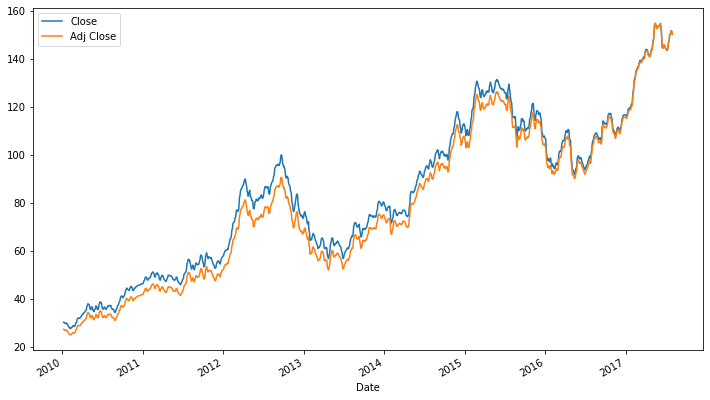

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

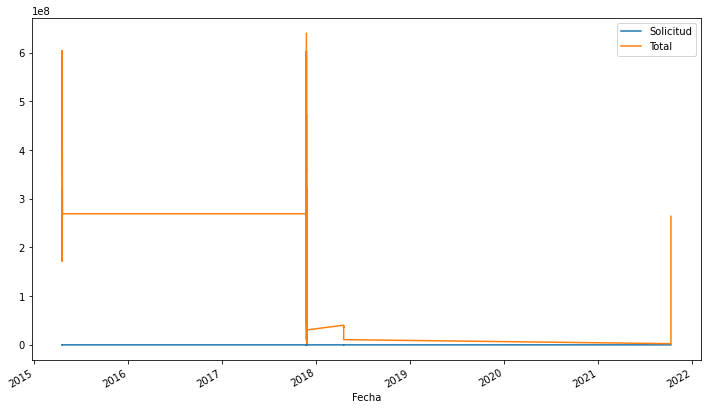

In [ ]:
# NUEVO EJEMPLO
# Looks so 'cause every dates are the same, excluding 1 over 2017
tienda.rolling(5)[['Solicitud', 'Total']].mean().plot()

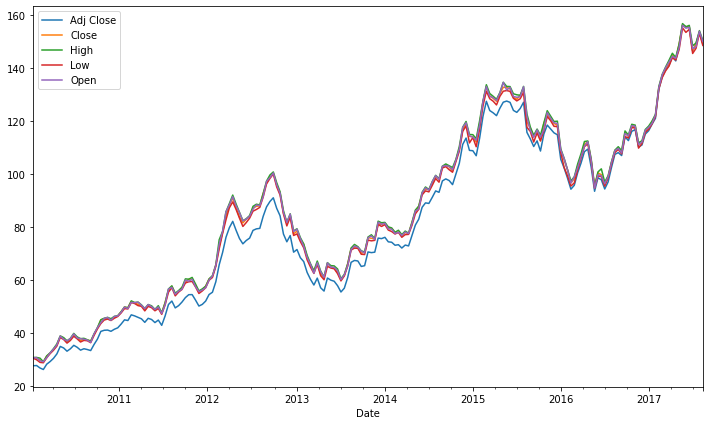

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

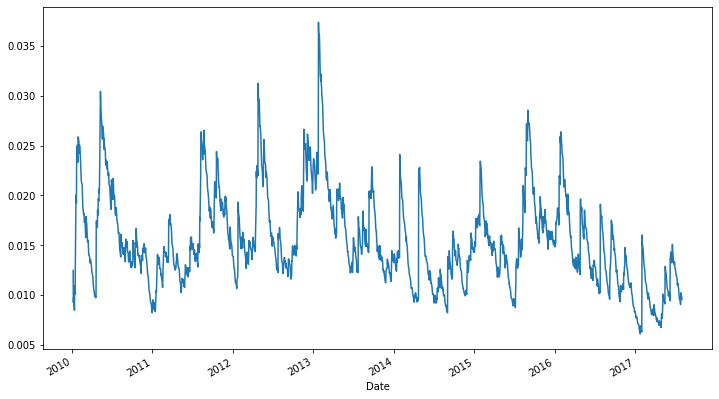

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

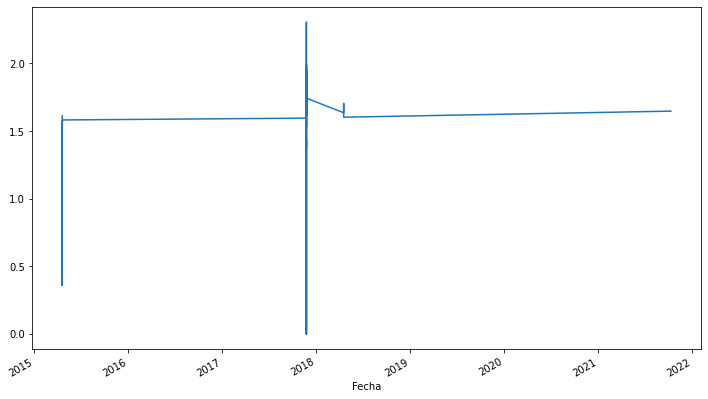

In [ ]:
# NUEVO EJEMPLO
# 30-day rolling exponentially-weighted stddev of returns.
tienda['Solicitud'].pct_change().ewm(span=50).std().plot();

# "Real World" Data

In [ ]:
# Resource: https://github.com/ssanderson/pydata-toolbox/blob/master/demos/avocados.py
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.

    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [ ]:
avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2020-01-03 00:00:00+00:00,NATIONAL,HASS,False,11726,1.08,NaN,NaN
1,2020-01-03 00:00:00+00:00,NATIONAL,HASS,True,1526,1.42,NaN,NaN
2,2020-01-03 00:00:00+00:00,NATIONAL,GREENSKIN,False,63,0.80,NaN,NaN
4,2020-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1776,1.09,0.69,2.0
5,2020-01-03 00:00:00+00:00,NORTHEAST,HASS,True,317,1.76,1.00,2.5


In [ ]:
# NUEVO EJEMPLO
# Los datos se tomaron de https://www.datos.gov.co/Gastos-Gubernamentales/Tienda-Virtual-del-Estado-Colombiano-Consolidado/rgxm-mmea
tienda = pd.read_csv('https://raw.githubusercontent.com/femorenoba/AlgorithmsUN2021II/main/Lab2/Tienda_virtual_Colombia.csv', parse_dates=['Fecha'], index_col='Fecha')
tienda.head()

,Anio,Identificador de la Orden,Rama de la Entidad,Sector de la Entidad,Entidad,Solicitante,Proveedor,Estado,Solicitud,Items,Total,Agregacion,Ciudad,Entidad Obigada,EsPostconflicto,NIT Proveedor,Actividad Economica Proveedor,ID Entidad
Fecha,,,,,,,,,,,,,,,,,,
2017-11-24,2017,22524,Ejecutiva,Justicia y del Derecho,ANDJE,Elena Villalba Villalobos,CONALCREDITOS CONALCENTER BPO,Emitida,39473,Ver Conjunto detalle,42840000.0,Centro de contacto,BogotÃ¡ D.C.,Obligada,No Definido,8.002197e+08,8220,340
2017-11-24,2017,22525,Ejecutiva,Minas y EnergÃ­a,SERVICIO GEOLOGICO COLOMBIANO,Monica Ponguta Achury,Subatours SAS,Emitida,39510,Ver Conjunto detalle,960496947.0,Tiquetes AÃ©reos,BogotÃ¡ D.C.,Obligada,No Definido,8.000750e+09,7911,65
2017-11-24,2017,22526,Organismos autÃ³nomo o independientes,Justicia y del Derecho,DEFENSORIA DEL PUEBLO,Gigliola Gravinni Marin,Oracle Colombia Ltda,Emitida,39474,Ver Conjunto detalle,23461856.0,Servicios Oracle,BOGOTA,No obligada,No Definido,8.001031e+08,6202,35
2017-11-24,2017,22527,Ejecutiva,PlaneaciÃ³n,SUPERINTENDENCIA DE SERVICIOS PUBLICOS DOMICIL...,illiam Elias Sanabria Romero,BPM Consulting,Emitida,39501,Ver Conjunto detalle,782159181.0,Centro de contacto,BogotÃ¡ D.C.,Obligada,No Definido,9.000114e+08,8220,67
2017-11-24,2017,22528,Ejecutiva,EducaciÃ³n Nacional,INSTITUTO NACIONAL PARA SORDOS INSOR,Andres Santiago Florez Ortegon,COLOMBIANA DE COMERCIO SA YO ALKOSTO SA,Cancelada,39427,Ver Conjunto detalle,621600.0,Grandes Superficies,BOGOTA,Obligada,No Definido,8.909009e+08,COMERCIO AL POR MAYO,104


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

In [ ]:
# NUEVO EJEMPLO
tienda.dtypes

Anio                               int64
Identificador de la Orden          int64
Rama de la Entidad                object
Sector de la Entidad              object
Entidad                           object
Solicitante                       object
Proveedor                         object
Estado                            object
Solicitud                          int64
Items                             object
Total                            float64
Agregacion                        object
Ciudad                            object
Entidad Obigada                   object
EsPostconflicto                   object
NIT Proveedor                    float64
Actividad Economica Proveedor     object
ID Entidad                         int64
dtype: object

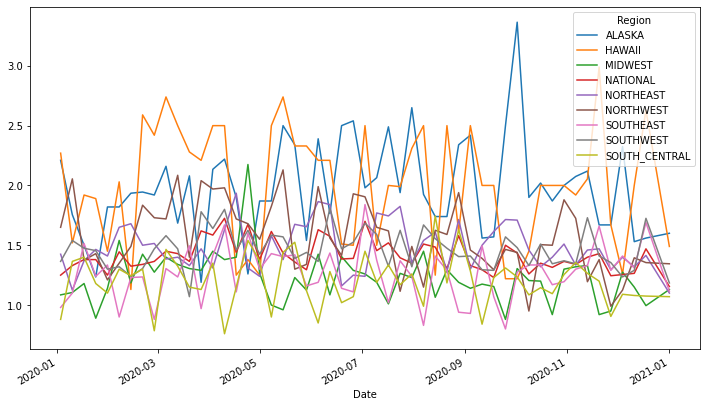

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

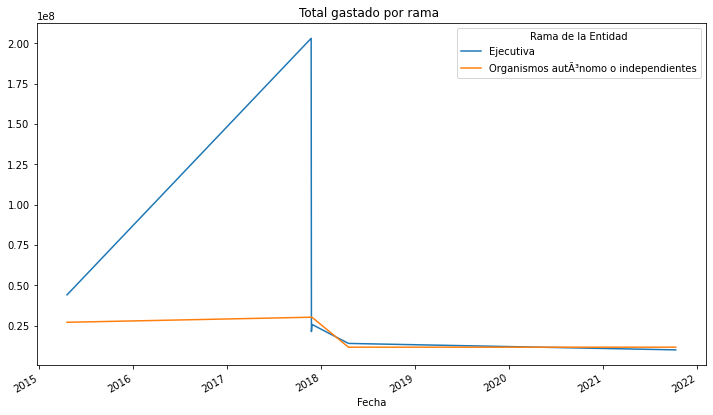

In [ ]:
# NUEVO EJEMPLO

total = tienda[tienda.Estado == 'Emitida']
total.groupby(['Fecha', 'Rama de la Entidad'])['Total'].mean().unstack().ffill().plot(title='Total gastado por rama ')

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

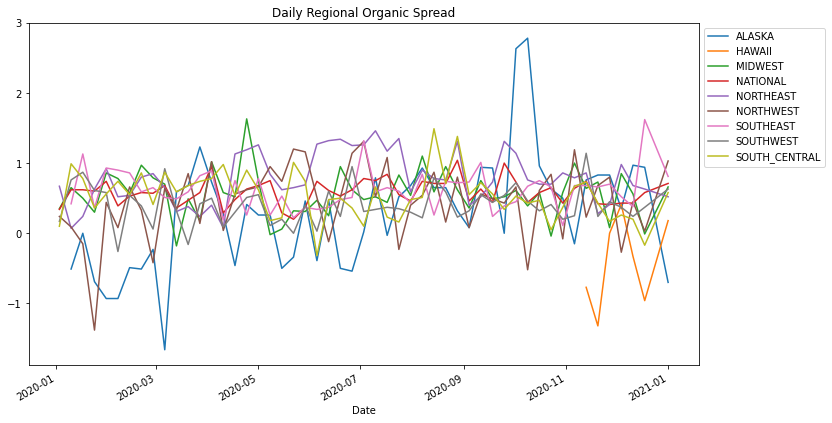

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,-0.568423,-0.135468,-0.018765,-0.021463,-0.081812,0.020231,0.022599,-0.071705
HAWAII,-0.568423,1.000000,0.184301,-0.065076,0.395642,-0.000865,-0.374570,0.005934,0.048621
MIDWEST,-0.135468,0.184301,1.000000,0.271917,0.248499,0.028823,-0.010976,0.103896,0.361171
NATIONAL,-0.018765,-0.065076,0.271917,1.000000,0.453021,0.204042,0.251058,0.382192,0.097065
NORTHEAST,-0.021463,0.395642,0.248499,0.453021,1.000000,0.130903,-0.102008,0.050316,-0.216374
NORTHWEST,-0.081812,-0.000865,0.028823,0.204042,0.130903,1.000000,0.042423,-0.049559,0.119735
SOUTHEAST,0.020231,-0.374570,-0.010976,0.251058,-0.102008,0.042423,1.000000,0.083666,-0.187184
SOUTHWEST,0.022599,0.005934,0.103896,0.382192,0.050316,-0.049559,0.083666,1.000000,0.224718
SOUTH_CENTRAL,-0.071705,0.048621,0.361171,0.097065,-0.216374,0.119735,-0.187184,0.224718,1.000000


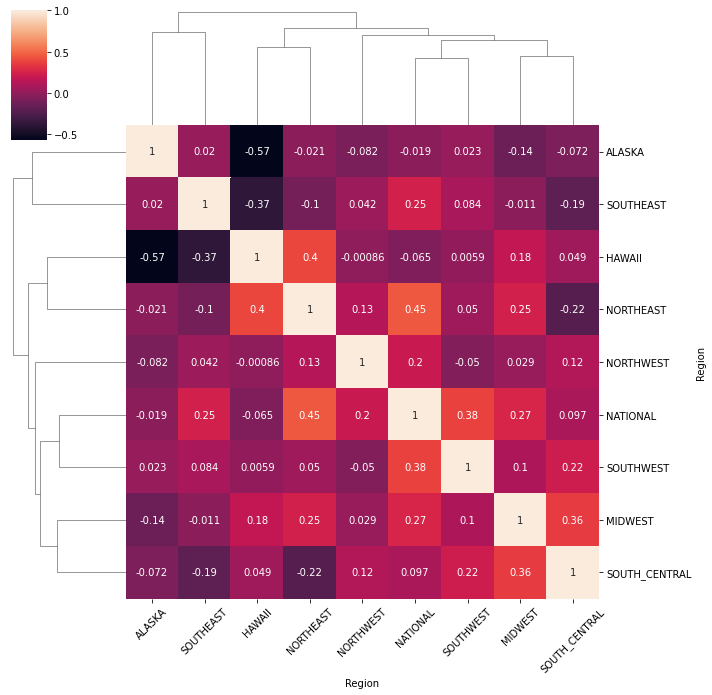

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!